# Exploring Language Patterns in Multilingual Climate Messages: Project Overview
This project explores `a multilingual parallel climate messaging dataset` that I co-created during the LUNE-TWO AI.Humanities.Social Sciences Research fellowship. 

The dataset contains aligned climate-related messages in English, Yoruba, Hausa, and Igbo. To take the work further, I experimented with embedding-based clustering to see how the messages naturally group together across languages.

Using models like XLM-Roberta, I generated sentence embeddings and applied techniques such as `K-Means clustering, t-SNE visualization, PCA projection,` and `Silhouette scoring`. The results revealed meaningful patterns. For example, Yoruba and Igbo clustered closely together, reflecting their shared Niger–Congo roots, while Hausa formed a distinct cluster, consistent with its Afro-Asiatic origin.

This small exploration shows how NLP techniques can uncover linguistic and semantic relationships in African languages while highlighting the potential for applying these methods to real-world, multilingual datasets.

# 1. Setup and Imports
Import core libraries for data handling and environment setup.

In [1]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/yor-stopwords/yoruba_stopwords.txt
/kaggle/input/climate-messaging-dataset/Combined Climate Dataset - for experiments.csv


# 2. Load Dataset
Load the multilingual climate messaging dataset (English source text + Yoruba, Hausa, Igbo translations)

In [2]:
df = pd.read_csv('/kaggle/input/climate-messaging-dataset/Combined Climate Dataset - for experiments.csv')
messages = df['Source']
df.head(5)

,Source,Igbo,Hausa,Yoruba
0,Heavy rain is coming soon. If you live near a ...,Oké mmiri ozuzo na-abịa ọsọso. Ọ bụrụ na ị bi ...,Ruwan sama mai ƙarfi yana zuwa nan ba da jimaw...,Òjò ńlá ń bọ̀ láìpẹ́. Bí ẹ bá ń gbé nítòsí odò...
1,Water levels are rising fast. Avoid flooded ro...,Mmiri na-arị elu ngwa ngwa. Zere ịga n'okporo ...,Matakin ruwa yana ƙaruwa da sauri. Guji hanyoy...,Omi ń yára ròkè. Yẹra fún àwọn ọ̀nà tí omi ti ...
2,"If your area floods easily, don’t wait till th...","Ọ bụrụ na mmiri na-ezo n'ebe i bi ngwa ngwa, e...","Idan yankinku na yawan ambaliya, kada ku jira ...","Tó bá jẹ́ pé omi máa ń bo àdúgbò rẹ, má ṣe dúr..."
3,"Drainage systems are already full, and more ra...","Ọwa mmiri jupụtara ebe nile, mmiri ozuzo na-ab...","Bututun magudanar ruwa sun cika, kuma ruwan sa...","Ọ̀nà tí omi gbà ń ṣàn ti kún, òjò á sì máa rọ̀..."
4,Floodwater is dirty and dangerous. If you must...,Mmiri iju mmiri na-adịghị ọcha ma dị ize ndụ. ...,Ruwa mai ambaliya yana da datti kuma haɗari ne...,Omi ìkún omi máa ń dọ̀tí ó sì léwu. Tó bá di d...


# 3. Text Cleaning & Tokenization
Clean text by lowercasing, removing punctuation/numbers, and tokenizing into word lists.

In [3]:
import re

def clean_text(text):
    text = str(text).lower()  # lowercase
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'\d+', '', text)      # remove digits (if any)
    text = re.sub(r'\s+', ' ', text)     # remove extra whitespace
    return text.strip()

for lang in ['Source', 'Yoruba', 'Hausa', 'Igbo']:
    df[f'{lang}_clean'] = df[lang].apply(clean_text)
    df[f'{lang}_tokens'] = df[f'{lang}_clean'].apply(lambda x: x.split())

df.head()

,Source,Igbo,Hausa,Yoruba,Source_clean,Source_tokens,Yoruba_clean,Yoruba_tokens,Hausa_clean,Hausa_tokens,Igbo_clean,Igbo_tokens
0,Heavy rain is coming soon. If you live near a ...,Oké mmiri ozuzo na-abịa ọsọso. Ọ bụrụ na ị bi ...,Ruwan sama mai ƙarfi yana zuwa nan ba da jimaw...,Òjò ńlá ń bọ̀ láìpẹ́. Bí ẹ bá ń gbé nítòsí odò...,heavy rain is coming soon if you live near a r...,"[heavy, rain, is, coming, soon, if, you, live,...",òjò ńlá ń bò láìpé bí ẹ bá ń gbé nítòsí odò tà...,"[òjò, ńlá, ń, bò, láìpé, bí, ẹ, bá, ń, gbé, ní...",ruwan sama mai ƙarfi yana zuwa nan ba da jimaw...,"[ruwan, sama, mai, ƙarfi, yana, zuwa, nan, ba,...",oké mmiri ozuzo naabịa ọsọso ọ bụrụ na ị bi ns...,"[oké, mmiri, ozuzo, naabịa, ọsọso, ọ, bụrụ, na..."
1,Water levels are rising fast. Avoid flooded ro...,Mmiri na-arị elu ngwa ngwa. Zere ịga n'okporo ...,Matakin ruwa yana ƙaruwa da sauri. Guji hanyoy...,Omi ń yára ròkè. Yẹra fún àwọn ọ̀nà tí omi ti ...,water levels are rising fast avoid flooded roa...,"[water, levels, are, rising, fast, avoid, floo...",omi ń yára ròkè yẹra fún àwọn ònà tí omi ti kú...,"[omi, ń, yára, ròkè, yẹra, fún, àwọn, ònà, tí,...",matakin ruwa yana ƙaruwa da sauri guji hanyoyi...,"[matakin, ruwa, yana, ƙaruwa, da, sauri, guji,...",mmiri naarị elu ngwa ngwa zere ịga nokporo ụzọ...,"[mmiri, naarị, elu, ngwa, ngwa, zere, ịga, nok..."
2,"If your area floods easily, don’t wait till th...","Ọ bụrụ na mmiri na-ezo n'ebe i bi ngwa ngwa, e...","Idan yankinku na yawan ambaliya, kada ku jira ...","Tó bá jẹ́ pé omi máa ń bo àdúgbò rẹ, má ṣe dúr...",if your area floods easily dont wait till the ...,"[if, your, area, floods, easily, dont, wait, t...",tó bá jé pé omi máa ń bo àdúgbò rẹ má ṣe dúró ...,"[tó, bá, jé, pé, omi, máa, ń, bo, àdúgbò, rẹ, ...",idan yankinku na yawan ambaliya kada ku jira h...,"[idan, yankinku, na, yawan, ambaliya, kada, ku...",ọ bụrụ na mmiri naezo nebe i bi ngwa ngwa eche...,"[ọ, bụrụ, na, mmiri, naezo, nebe, i, bi, ngwa,..."
3,"Drainage systems are already full, and more ra...","Ọwa mmiri jupụtara ebe nile, mmiri ozuzo na-ab...","Bututun magudanar ruwa sun cika, kuma ruwan sa...","Ọ̀nà tí omi gbà ń ṣàn ti kún, òjò á sì máa rọ̀...",drainage systems are already full and more rai...,"[drainage, systems, are, already, full, and, m...",ònà tí omi gbà ń ṣàn ti kún òjò á sì máa rò ló...,"[ònà, tí, omi, gbà, ń, ṣàn, ti, kún, òjò, á, s...",bututun magudanar ruwa sun cika kuma ruwan sam...,"[bututun, magudanar, ruwa, sun, cika, kuma, ru...",ọwa mmiri jupụtara ebe nile mmiri ozuzo naabịa...,"[ọwa, mmiri, jupụtara, ebe, nile, mmiri, ozuzo..."
4,Floodwater is dirty and dangerous. If you must...,Mmiri iju mmiri na-adịghị ọcha ma dị ize ndụ. ...,Ruwa mai ambaliya yana da datti kuma haɗari ne...,Omi ìkún omi máa ń dọ̀tí ó sì léwu. Tó bá di d...,floodwater is dirty and dangerous if you must ...,"[floodwater, is, dirty, and, dangerous, if, yo...",omi ìkún omi máa ń dòtí ó sì léwu tó bá di dan...,"[omi, ìkún, omi, máa, ń, dòtí, ó, sì, léwu, tó...",ruwa mai ambaliya yana da datti kuma haɗari ne...,"[ruwa, mai, ambaliya, yana, da, datti, kuma, h...",mmiri iju mmiri naadịghị ọcha ma dị ize ndụ ọ ...,"[mmiri, iju, mmiri, naadịghị, ọcha, ma, dị, iz..."


# 4. Embedding Model Selection

Tried different multilingual transformers (AfriBERTa vs. XLM-RoBERTa). Final choice: XLM-RoBERTa for embedding extraction.

In [4]:
from transformers import AutoTokenizer, AutoModel
import torch

# Finally chose the xlm-roberta tokenizer and model
model_name = 'xlm-roberta-base'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

2025-09-05 10:16:38.508774: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757067398.851039      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757067398.946649      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

# 5. Language-Specific Preprocessing (Stopwords)

Loaded Yoruba stopwords (with Unicode normalization for tonal marks).

In [5]:
import unicodedata

def load_yoruba_stopwords(filepath):
    stopwords = set()
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            word = line.strip()
            # Normalize Unicode to NFC to compose tonal characters
            normalized = unicodedata.normalize("NFC", word)
            if normalized:
                stopwords.add(normalized)
    return list(stopwords)

yoruba_stop_words=load_yoruba_stopwords("/kaggle/input/yor-stopwords/yoruba_stopwords.txt")
print(yoruba_stop_words)

['nǹkan', 'yẹn', 'yìí', 'mọ̀', 'tọ́', 'kò', 'ọ̀kan', 'pọ̀', 'lè', 'ka', 'gbogbo', 'kòyọ̀', 'jẹ', 'é', 'gbà', 'kan', 'í', 'rọ̀', 'bọ', 'gbọ́', 'ti', 'fẹ̀', 'tí', 'wá', 'pẹlu', 'nà', 'nigbà', 'sì', 'ilẹ̀', 'ohun', 'kíni', 'ẹni', 'ńṣe', 'bá', 'ta', 'yóò', 'lati', 'lẹ́yìn', 'a', 'sínú', 'ọjọ́', 'ńlá', 'ki', 'ati', 'bọ̀', 'ọ̀pọ̀', 'kọ̀', 'mọ́', 'ṣáájú', 'kíákíá', 'ojọ', 'ilu', 'ni', 'wọ́n', 'iyẹn', 'le', 'wọn', 'awọn', 'kí', 'rọ', 'sọ̀rọ̀', 'ara', 'jẹ́', 'ní', 'lọ', 'àti', 'tó', 'ń', 'fún', 'mi', 'nibo', 'mura', 'bo', 'di', 'e', 'mo', 'làti', 'fẹ́', 'ojò', 'kankan', 'ọdún', 'ẹ', 'lọ́wọ́', 'fun', 'ọkan', 'wà', 'púpọ̀', 'bákan', 'sọ', 'eyi', 'nítorí', 'pé', 'ṣe', 'òhun', 'ọ̀rọ̀', 'n', 'pẹ̀lú', 'ṣùgbọ́n', 'o', 'ò', 'wa', 'kó', 'bí', 'ìyẹn', 'rẹ', 'ilé', 'nínu', 'ọ̀kàn', 'àmọ́', 'sí', 'gbé', 'an', 'na', 'láti', 'náà', 'níbo', 'nígbà', 'ọmọ', 'máa', 'tàbí', 'ninu', 'ló', 'báwo', 'ọ̀pọ̀lọpọ̀', 'tọ', 'fi', 'àwọn', 'bọ́', 'lọ́kàn', 'ye', 'nínú', 'dájúdájú', 'ó', 'pa', 'rẹ̀', 'ìkan', 'ṣé']


# 6. Extract Sentences by Language
Prepared language-specific sentence lists for embedding + clustering analysis.

In [6]:
yoruba_sents = df['Yoruba'].tolist()
hausa_sents=df['Hausa'].tolist()
igbo_sents=df['Igbo'].tolist()

In [7]:
# Sample Yoruba sentence

def preprocess_yoruba(texts):
    preprocessed=[]
    for text in texts:
        tokens = text.lower().split()
        filtered = [word for word in tokens if word not in yoruba_stop_words]
        new_text=' '.join(filtered)
        preprocessed.append(new_text)
    return preprocessed

yoruba_sentences=preprocess_yoruba(yoruba_sents)
print(len(yoruba_sentences))
print(yoruba_sentences[:5])

714
['òjò bọ̀ láìpẹ́. nítòsí odò àgbègbè bẹ́ẹ̀ jìnnà odò, jọ̀wọ́ iyebíye yín síbi ga. dára ààbò.', 'omi yára ròkè. yẹra ọ̀nà omi kún inú rẹ̀, omi díẹ̀ péré mú ọkọ̀ dúró. lójúfò!', 'jẹ́ omi àdúgbò rẹ, má dúró títí dìgbà yá. nílò, oúnjẹ, omi, oògùn ìwé pàtàkì àpò pàjáwìrì.', 'ọ̀nà omi ṣàn kún, òjò á rọ̀ lọ́jọ́ iwájú. kíyè i omi sókè, bẹ̀rẹ̀ ṣètò bó kúrò níbẹ̀ kánjúkánjú.', 'omi ìkún omi dọ̀tí léwu. dandan la ojú ọ̀nà kọjá, rí i dáàbò ẹsẹ̀ rẹ, tètè wẹ̀. má ìlera wewu.']


# 7. Generate Sentence Embeddings

In [8]:
def get_sentence_embeddings(sentences, tokenizer, model):
    """
    Tokenize and extract sentence embeddings for a list of sentences.
    Uses mean pooling over token embeddings.
    """
    inputs = tokenizer(sentences, padding=True, truncation=True, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1).numpy()
    return embeddings


# 8. Clustering with K - means

In [9]:
from sklearn.cluster import KMeans
from collections import defaultdict

def cluster_sentences(sentences, embeddings, num_clusters=2):
    """
    Run KMeans clustering on sentence embeddings and 
    group original sentences by cluster label.
    """
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(embeddings)
    
    clustered = defaultdict(list)
    for idx, label in enumerate(labels):
        clustered[label].append(sentences[idx])
    return clustered, labels


# 9. Apply functions per language

In [10]:
# Yoruba
yoruba_embeddings = get_sentence_embeddings(yoruba_sents, tokenizer, model)
yoruba_clusters, yoruba_labels = cluster_sentences(yoruba_sents, yoruba_embeddings, num_clusters=2)

# Hausa
hausa_embeddings = get_sentence_embeddings(hausa_sents, tokenizer, model)
hausa_clusters, hausa_labels = cluster_sentences(hausa_sents, hausa_embeddings, num_clusters=2)

# Igbo
igbo_embeddings = get_sentence_embeddings(igbo_sents, tokenizer, model)
igbo_clusters, igbo_labels = cluster_sentences(igbo_sents, igbo_embeddings, num_clusters=2)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 10. Preview clusters

In [11]:
def preview_clusters(clustered, n=10):
    """
    Print sample sentences from each cluster.
    """
    for cluster_id, sentences in clustered.items():
        print(f"\nCluster {cluster_id} ({len(sentences)} messages):")
        for sent in sentences[:n]:
            print(" -", sent)

In [12]:
print("Yoruba Clusters:")
preview_clusters(yoruba_clusters, n=10)

print("\nHausa Clusters:")
preview_clusters(hausa_clusters, n=10)

print("\nIgbo Clusters:")
preview_clusters(igbo_clusters, n=10)

Yoruba Clusters:

Cluster 1 (480 messages):
 - Òjò ńlá ń bọ̀ láìpẹ́. Bí ẹ bá ń gbé nítòsí odò tàbí àgbègbè tí kò fi bẹ́ẹ̀ jìnnà sí odò, ẹ jọ̀wọ́ ẹ gbé àwọn nǹkan iyebíye yín lọ síbi tó ga. Ó dára láti wà ní ààbò.
 - Omi ń yára ròkè. Yẹra fún àwọn ọ̀nà tí omi ti kún inú rẹ̀, omi díẹ̀ péré lè gbé ẹ lọ tàbí kó mú kí ọkọ̀ rẹ dúró. Ẹ wà lójúfò!
 - Ooru ti gbóná gan-an lónìí. Tó bá ń ṣe ẹ́ bí ẹni pé orí rẹ ń wú tàbí pé o kò lágbára, lọ síbi tó ṣókùnkùn, kó o sì mu omi tó pọ̀. Má ṣe gbójú fo àwọn àmì náà dá!
 - Wo bí àwọn àgbàlagbà àtàwọn ọmọdé ṣe ń ṣe sí. Wọ́n á túbọ̀ máa tiraka nínú ooru tó le gan-an. Rí i dájú pé wọ́n ń mu omi, kí ara wọn sì tutù.
 - Gbìyànjú láti dín iṣẹ́ tí wàá máa ṣe níta kù lákòókò tí ooru bá pọ̀ jù. Bó bá pọn dandan pé kó o jáde, máa wọ aṣọ tó mọ́ tónítóní, kó o sì máa sinmi lọ́pọ̀ ìgbà.
 - Àìmọye ìgbà ni iná mànàmáná máa ń dín kù nítorí pé àwọn èèyàn máa ń nílò iná mànàmáná gan-an. Máa fi fóònù rẹ ṣírò owó, kó o sì máa tọ́jú omi tó o máa lò lọ́wọ́ tó bá ṣẹlẹ̀ pé iná 

# 11. Shrinking Embeddings into 2D with t-SNE

To get an intuitive feel for the clusters, I reduced the high-dimensional sentence embeddings into 2D using t-SNE. This allows us to visually inspect how messages group together, making patterns and separations between clusters easier to spot

In [13]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plot_tsne(embeddings, labels, title, perplexity=30, n_iter=1000):
    """
    Reduce embeddings to 2D with t-SNE and plot clusters.
    """
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity, n_iter=n_iter)
    reduced_embeddings = tsne.fit_transform(embeddings)

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1],
                          c=labels, cmap='tab10', s=50)
    plt.title(title, fontsize=14)
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.colorbar(scatter, label='Cluster ID')
    plt.grid(True)
    plt.show()


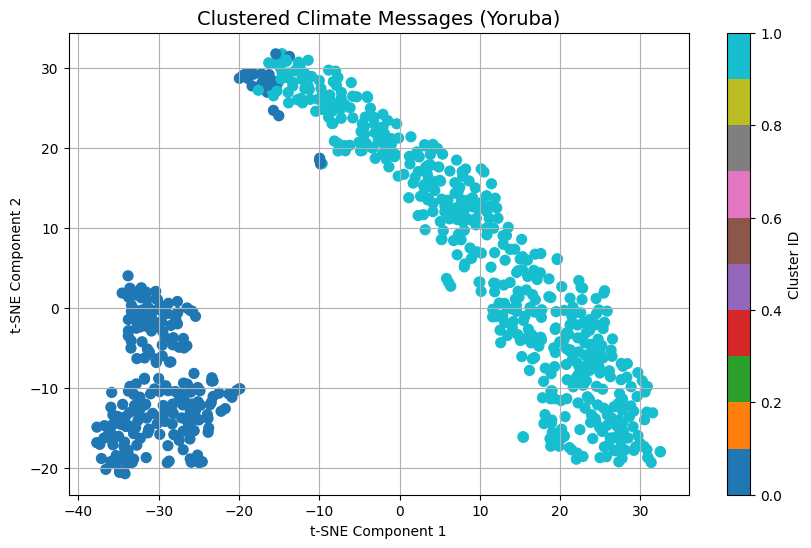

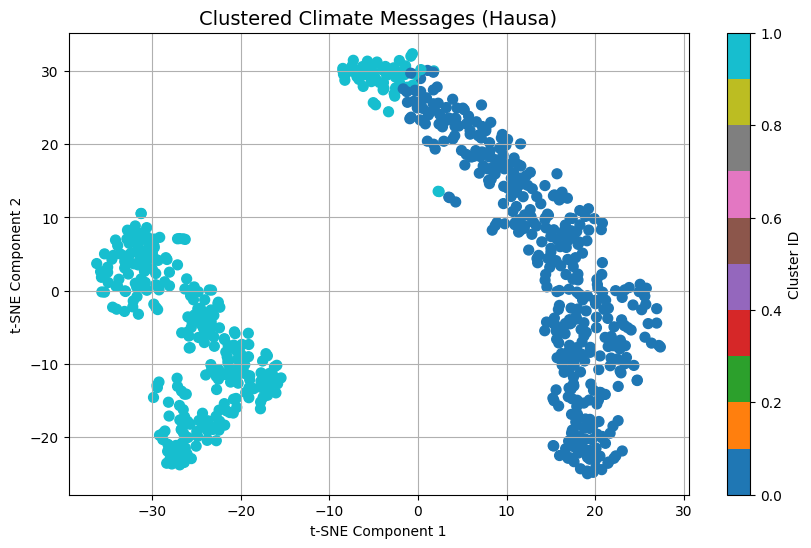

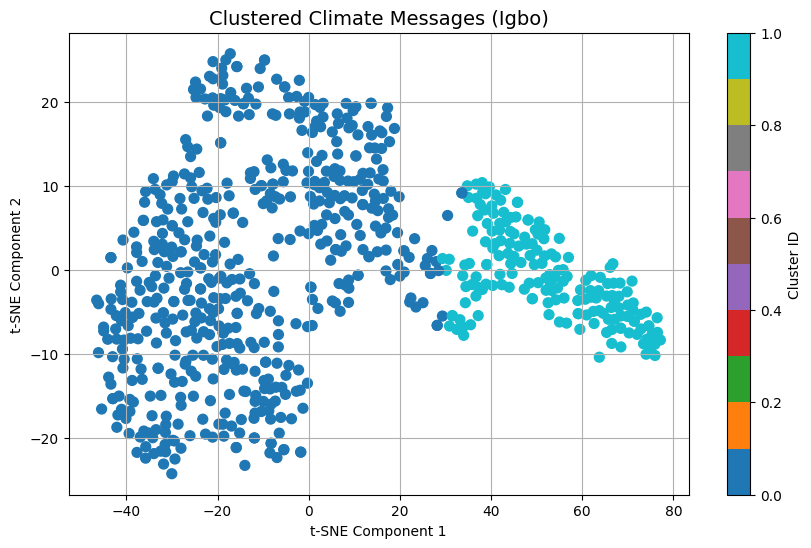

In [14]:
plot_tsne(yoruba_embeddings, yoruba_labels, "Clustered Climate Messages (Yoruba)")
plot_tsne(hausa_embeddings, hausa_labels, "Clustered Climate Messages (Hausa)")
plot_tsne(igbo_embeddings, igbo_labels, "Clustered Climate Messages (Igbo)")

# 12. Finding out the best number of clusters (2) using the elbow method

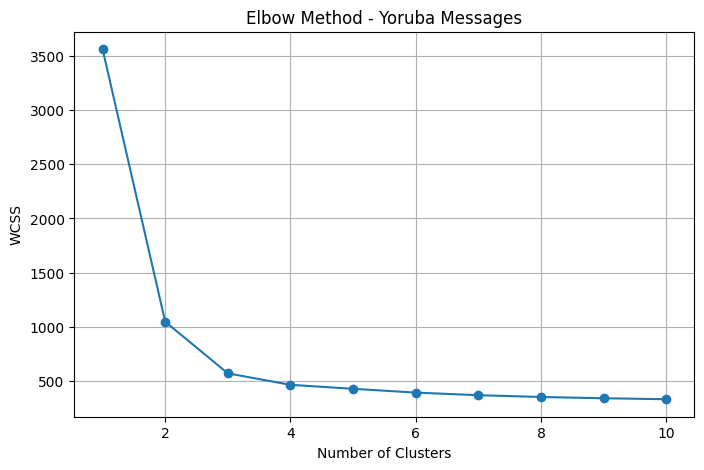

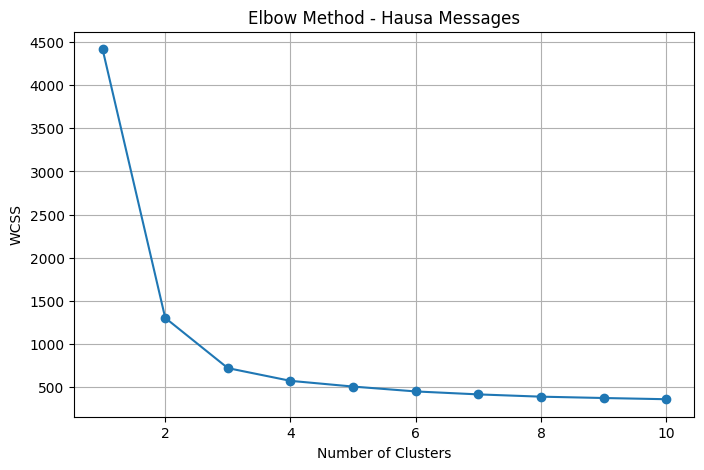

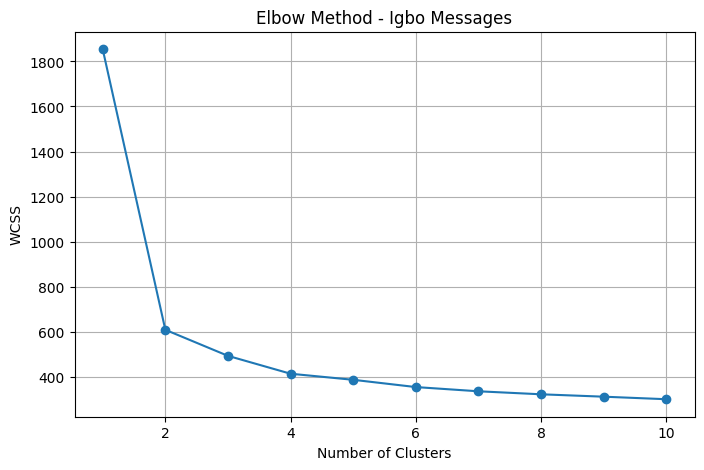

In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def plot_elbow(embeddings, title, max_clusters=10):
    """
    Plot the Elbow Method graph for KMeans clustering.
    
    Parameters:
    - embeddings: sentence embeddings (numpy array)
    - title: title for the plot
    - max_clusters: maximum number of clusters to test
    """
    wcss = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', 
                        max_iter=300, n_init=10, random_state=42)
        kmeans.fit(embeddings)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters + 1), wcss, marker='o')
    plt.title(f'Elbow Method - {title}')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.grid(True)
    plt.show()

plot_elbow(yoruba_embeddings, "Yoruba Messages")
plot_elbow(hausa_embeddings, "Hausa Messages")
plot_elbow(igbo_embeddings, "Igbo Messages")


The most consistent point sharp point in all 3 graphs is when n=2

# 13. Measuring Cluster Quality with Silhouette Score

To check how well the clusters represent the data, I calculated the Silhouette Scores for each language. The results show reasonably good separation: Yoruba (0.605), Hausa (0.579), and Igbo (0.618). Since scores above 0.5 generally indicate meaningful clusters, this suggests that the embeddings capture useful distinctions in the climate messages across all three languages.

In [16]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

def evaluate_clusters(embeddings, sentences, n_clusters=2, lang_name="Language"):
    """
    Perform KMeans clustering, compute Silhouette Score,
    and print sample sentences from each cluster.
    
    Parameters:
    - embeddings: sentence embeddings (numpy array)
    - sentences: list of sentences
    - n_clusters: number of clusters to test
    - lang_name: name of the language (for labeling output)
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(embeddings)

    sil_score = silhouette_score(embeddings, kmeans.labels_)
    print(f"{lang_name} - Silhouette Score: {sil_score:.3f}")

# Run for Yoruba, Hausa, and Igbo
evaluate_clusters(yoruba_embeddings, yoruba_sents, n_clusters=2, lang_name="Yoruba")
evaluate_clusters(hausa_embeddings, hausa_sents, n_clusters=2, lang_name="Hausa")
evaluate_clusters(igbo_embeddings, igbo_sents, n_clusters=2, lang_name="Igbo")


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Yoruba - Silhouette Score: 0.605
Hausa - Silhouette Score: 0.579
Igbo - Silhouette Score: 0.618


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 14. Comparing Language Families with Clustering

To explore how languages relate to each other, I clustered embeddings of sentence pairs across Yoruba, Igbo, and Hausa. The PCA plots reveal a clear pattern: Yoruba and Igbo cluster more closely together, reflecting their shared Niger–Congo (Volta-Niger) language family. In contrast, Hausa forms a more distinct cluster, consistent with its Afro-Asiatic roots.

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


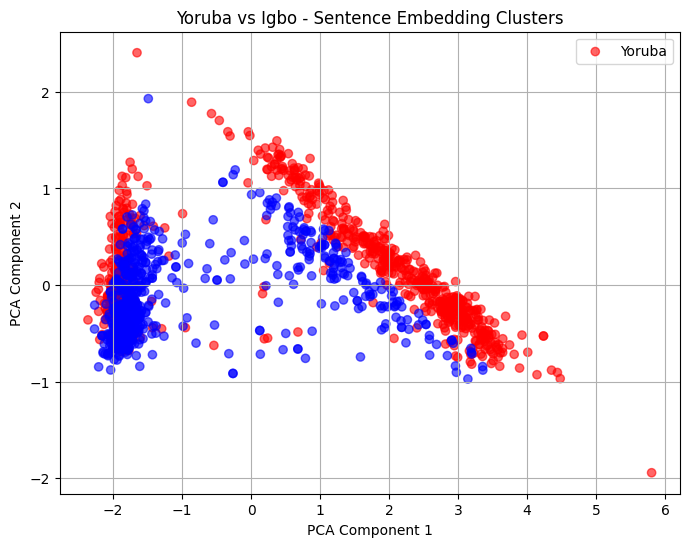

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


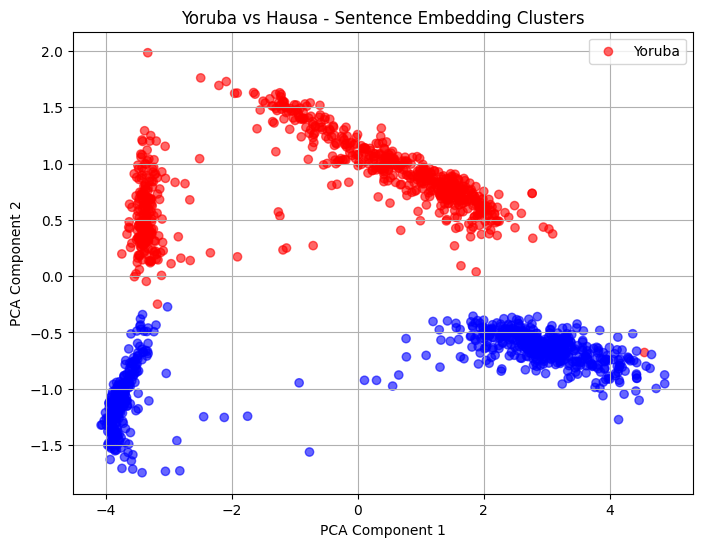

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


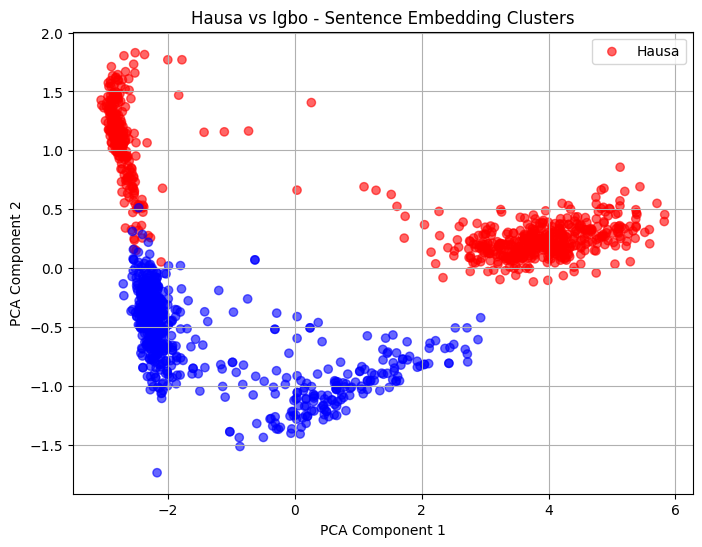

In [17]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import torch

def cluster_and_plot(lang1_sents, lang2_sents, lang1_name, lang2_name, tokenizer, model):
    """
    Cluster and visualize sentence embeddings for two languages.
    
    Args:
        lang1_sents (list): Sentences in language 1
        lang2_sents (list): Sentences in language 2
        lang1_name (str): Name of language 1 (e.g., 'Yoruba')
        lang2_name (str): Name of language 2 (e.g., 'Igbo')
        tokenizer: HuggingFace tokenizer
        model: HuggingFace model
    """
    # Combine sentences
    combined_sents = lang1_sents + lang2_sents
    labels = [lang1_name] * len(lang1_sents) + [lang2_name] * len(lang2_sents)

    # Tokenize
    inputs = tokenizer(combined_sents, padding=True, truncation=True, return_tensors="pt")

    # Get embeddings (mean pooling)
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1).numpy()

    # Clustering
    kmeans = KMeans(n_clusters=2, random_state=42)
    cluster_labels = kmeans.fit_predict(embeddings)

    # Dimensionality reduction for plotting
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(embeddings)

    # Colors based on actual language label
    colors = ['red' if lbl == lang1_name else 'blue' for lbl in labels]

    # Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced[:, 0], reduced[:, 1], c=colors, alpha=0.6)
    plt.title(f"{lang1_name} vs {lang2_name} - Sentence Embedding Clusters")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend([lang1_name, lang2_name])
    plt.grid(True)
    plt.show()

cluster_and_plot(yoruba_sents, igbo_sents, "Yoruba", "Igbo", tokenizer, model)
cluster_and_plot(yoruba_sents, hausa_sents, "Yoruba", "Hausa", tokenizer, model)
cluster_and_plot(hausa_sents, igbo_sents, "Hausa", "Igbo", tokenizer, model)


# 15. Visualizing All Three Languages Together

When plotting Yoruba, Igbo, and Hausa embeddings in the same space, the separation becomes clearer. As stated above, Yoruba and Igbo points cluster close to each other, reflecting their shared Niger–Congo roots, while Hausa forms a distinct group, consistent with its Afro-Asiatic origin. This visualization nicely mirrors the linguistic families the languages belong to.

In [18]:
all_sents = yoruba_sents + hausa_sents + igbo_sents 
inputs = tokenizer(all_sents, padding=True, truncation=True, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)
sentence_embeddings = outputs.last_hidden_state.mean(dim=1).numpy()
labels = (
    ['yoruba'] * len(yoruba_sents)
    + ['hausa'] * len(hausa_sents)
    + ['igbo'] * len(igbo_sents)
)

palette = {
    'yoruba': '#2ca02c',  # green
    'igbo': '#1f77b4',    # blue
    'hausa': '#d62728'    # red
}

reduced_embeddings = PCA(n_components=2).fit_transform(sentence_embeddings)
plt.figure(figsize=(10, 7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

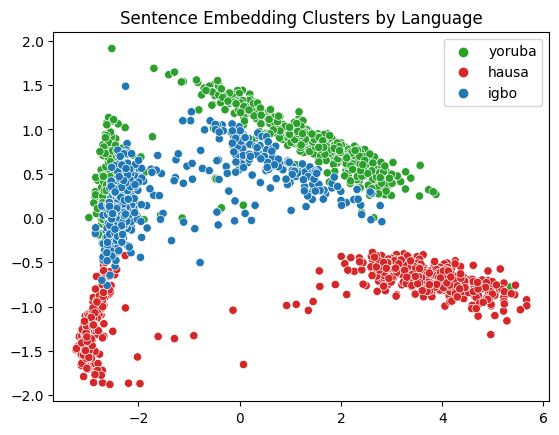

In [19]:
import seaborn as sns
sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1], hue=labels, palette=palette)
plt.title("Sentence Embedding Clusters by Language")
plt.show()